##*Demonstrate these predictive analytic techniques to predict service Rate in the time series data*

Importing the Libraries

In [1]:
import pandas as pd #Use
import numpy as np #Use
from sklearn.preprocessing import LabelEncoder #Use
from sklearn.linear_model import LinearRegression #Use
from sklearn.model_selection import train_test_split #Use
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #Use
import matplotlib.pyplot as plt #Use
from sklearn.neighbors import KNeighborsRegressor #Use
from sklearn.tree import DecisionTreeRegressor #Use
from sklearn.feature_selection import RFE #Use
from sklearn.feature_selection import SelectKBest, f_regression #Use // f_regression is used for regression problems, I use it for linear regression
import statsmodels.api as sm

Reading the Data From CSV File

In [2]:
Data = pd.read_csv(r"C:\Users\LENOVO\OneDrive - AL-Hussien bin Abdullah Technical University\(1) Raneem UNI\SECOND-YEAR-\Second_Sem\Analytics\Final assignment\Updated_data (1).csv")


In [3]:
Data.head()

,NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (True/False),Primary UZA UACE Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,...,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries,Rate
0,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000
1,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.055038
2,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.029486
3,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.013352
4,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000


In [4]:
Data.shape

(39729, 65)

Preprosesing The Data

In [5]:
Data.isnull().sum()

NTD ID                  0
Agency                  0
Organization Type       0
Mode                    0
Type of Service         0
                       ..
Trespasser Injuries     0
Suicide Injuries        0
Total Other Injuries    0
Total Injuries          0
Rate                    0
Length: 65, dtype: int64

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39729 entries, 0 to 39728
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   NTD ID                                      39729 non-null  int64  
 1   Agency                                      39729 non-null  object 
 2   Organization Type                           39729 non-null  object 
 3   Mode                                        39729 non-null  object 
 4   Type of Service                             39729 non-null  object 
 5   Rail (True/False)                           39729 non-null  bool   
 6   Primary UZA UACE Code                       39729 non-null  int64  
 7   Primary UZA Name                            39729 non-null  object 
 8   Primary UZA Sq Miles                        39729 non-null  float64
 9   Primary UZA Population                      39729 non-null  int64  
 10  Service Ar

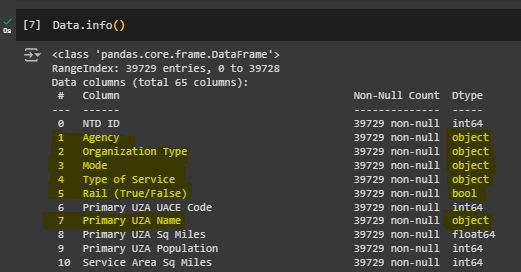

In [7]:
label_encoder = LabelEncoder()
Data['Agency'] = label_encoder.fit_transform(Data['Agency'])
Data['Organization Type'] = label_encoder.fit_transform(Data['Organization Type'])
Data['Mode'] = label_encoder.fit_transform(Data['Mode'])
Data['Type of Service'] = label_encoder.fit_transform(Data['Type of Service'])
Data['Rail (True/False)'] = label_encoder.fit_transform(Data['Rail (True/False)'])
Data['Primary UZA Name'] = label_encoder.fit_transform(Data['Primary UZA Name'])

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39729 entries, 0 to 39728
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   NTD ID                                      39729 non-null  int64  
 1   Agency                                      39729 non-null  int32  
 2   Organization Type                           39729 non-null  int32  
 3   Mode                                        39729 non-null  int32  
 4   Type of Service                             39729 non-null  int32  
 5   Rail (True/False)                           39729 non-null  int64  
 6   Primary UZA UACE Code                       39729 non-null  int64  
 7   Primary UZA Name                            39729 non-null  int32  
 8   Primary UZA Sq Miles                        39729 non-null  float64
 9   Primary UZA Population                      39729 non-null  int64  
 10  Service Ar

In [9]:
Data.head(10)

,NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (True/False),Primary UZA UACE Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,...,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries,Rate
0,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000
1,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.055038
2,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.029486
3,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.013352
4,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000
5,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000
6,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000
7,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.045420
8,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.013754
9,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.026418


The Target column and Spliting the Data

In [10]:
X = Data.drop(['Rate'], axis = 1)
y = Data['Rate']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
X.head()

,NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (True/False),Primary UZA UACE Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,...,Pedestrian in Crosswalk Injuries,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries
0,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0
1,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0
2,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0
3,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0
4,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0


Removing Value with low variance ''For me''

1.   List item
2.   List item



In [13]:
#In this code I will use the VarianceThreshold method to select the features with the highest variance and remove the features with the lowest variance
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
variance = X.var()
selector = VarianceThreshold(threshold = 5)
selector.fit(X_train)
selector_features = X.columns[selector.get_support()] #It is going to return the selected features
print("the selected features are")
for feature in selector_features:
    print(feature)
#print(len(selector_features))
X_train_selected = X_train[selector_features]
X_test_selected = X_test[selector_features]

the selected features are
NTD ID
Agency
Mode
Primary UZA UACE Code
Primary UZA Name
Primary UZA Sq Miles
Primary UZA Population
Service Area Sq Miles
Service Area Population
Month
Vehicles
Vehicle Revenue Miles
Vehicle Revenue Hours
Unlinked Passenger Trips
Total Fires
Total Security Events
Total Events Not Otherwise Classified
Total Events
Passenger Injuries
People Waiting or Leaving Injuries
Total Injuries


In [14]:
reg = LinearRegression().fit(X_train_selected, y_train)#I use the linear regression model to fit the selected features the fit method is used to train the model
y_pred = reg.predict(X_test_selected)# the pridect method is used to predict the target values using the test data

In [15]:
mae = mean_absolute_error(y_test, y_pred)#These 'mse, mae, rmse, r2' are the regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Here I will print the regression metrics
print("\nRegression Metrics:")
print("MAE:", round(mae, 3))
print("MSE:", round(mse, 3))
print("RMSE:", round(rmse, 3))
print("R²:", round(r2, 3))6

SyntaxError: invalid syntax (2417207182.py, line 11)

![image.png](attachment:image.png)

_________________________________________________________________________________

### 1. Choose two feature selection

## 1. SelectKBest :  *Feature Selection*

#### SelectKBest -Linear Regression-

In [ ]:
Fselector = SelectKBest(f_regression, k = 5) #I started with the SelectKBest method to select the best 5 features
Fselector.fit(X, y)

selected_columns = X.columns[Fselector.get_support()]#It is going to return the selected features
print("These are the selected cloumns", selected_columns)

#X_selected_selector = Fselector.transform(X)

These are the selected cloumns Index(['Vehicles', 'Vehicle Revenue Hours',
       'Total Events Not Otherwise Classified', 'Total Events',
       'Total Injuries'],
      dtype='object')


In [ ]:
Fselector_result = []   #I will use this list to store the regression metrics for each iteration in the loop of SelectKBest

for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i) #I will split the data into training and testing data
    X_train_selected = Fselector.transform(X_train) #I will transform the training data to the selected features
    X_test_selected = Fselector.transform(X_test) #I will transform the testing data to the selected features

    len_model = LinearRegression().fit(X_train_selected, y_train) #I use the linear regression model to fit the selected features and this fit method is used to train the model
    y_pred = len_model.predict(X_test_selected) # the pridect method is used to predict the target values using the test data

    SKB_mae_linear = mean_absolute_error(y_test, y_pred) # using the regression metrics to evaluate the model performance and y_test is the actual target values of the test data and y_pred is the predicted target values of the test data 
    SKB_mse_linear = mean_squared_error(y_test, y_pred)
    SKB_rmse_linear = np.sqrt(SKB_mse_linear)
    SKB_r2_linear = r2_score(y_test, y_pred)

    metrics = { #I will store the regression metrics in this dictionary 'metrics'
        'MAE': SKB_mae_linear,
        'MSE': SKB_mse_linear,
        'RMSE': SKB_rmse_linear,
        'R2': SKB_r2_linear
    }

    Fselector_result.append(metrics) 

linearResults = pd.DataFrame(Fselector_result) #I will store the regression metrics in this dataframe 'linearResults'

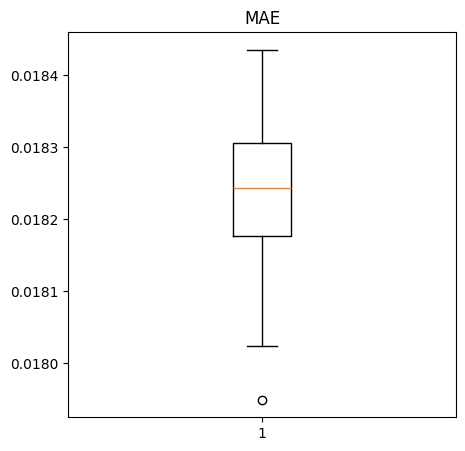

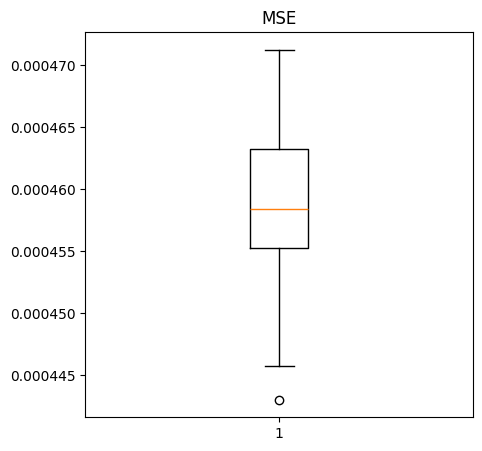

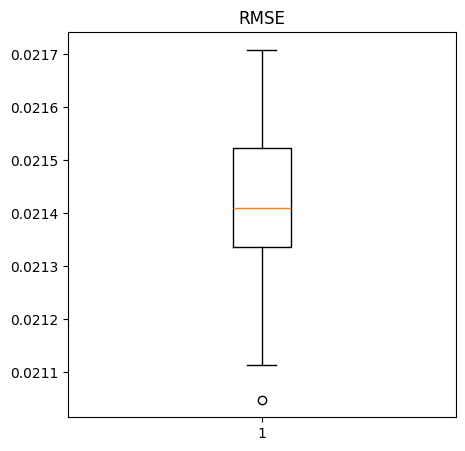

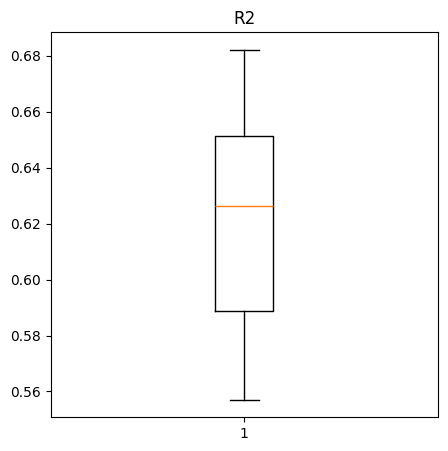

In [ ]:
for column in linearResults.columns: #I will plot the regression metrics for each iteration in the loop of SelectKBest in a boxplot it will help me to see the distribution of the regression metrics
    plt.figure(figsize=(5, 5))
    plt.boxplot(linearResults[column], vert=True) #I will use the boxplot to see the distribution of the regression metrics for each iteration in the loop of SelectKBest the linearResults[column] is the regression metrics
    plt.title(column)
    plt.show()

In [ ]:
TheResults = {} #I will store the regression metrics for the linear regression model in this dictionary 'TheResults'

TheResults['The Linear Regression Model'] = {
    'MAE': round(linearResults['MAE'].mean(), 3),
    'MSE': round(linearResults['MSE'].mean(), 3),
    'RMSE': round(linearResults['RMSE'].mean(), 3),
    'R2': round(linearResults['R2'].mean(), 3)
}

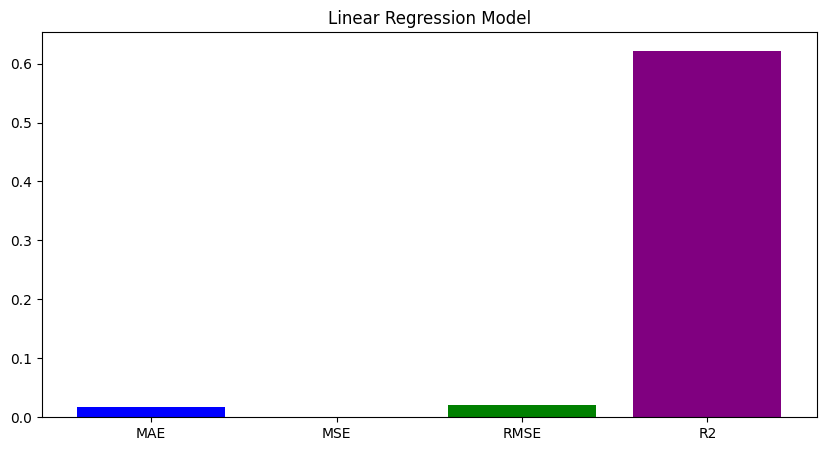

In [ ]:
plt.figure(figsize=(10, 5)) #This plot 'Bar Chart' will help me to see the average of the regression metrics for the linear regression model
plt.bar(TheResults['The Linear Regression Model'].keys(), TheResults['The Linear Regression Model'].values(), color=['blue', 'red', 'green', 'purple'])
plt.title('Linear Regression Model')
plt.show()

In [ ]:
linearResults.mean()

MAE     0.018239
MSE     0.000459
RMSE    0.021418
R2      0.622358
dtype: float64

KNN REGRESSOR

In [ ]:
#KNN regressor
knn_results = [] #I will use this list to store the regression metrics for each iteration in the loop of SelectKBest
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)    
    knn = KNeighborsRegressor(n_neighbors=5) #I will use the KNN regressor model with 5 neighbors
    knn.fit(X_train, y_train) #I will fit the model with the training data
    y_pred = knn.predict(X_test) #I will predict the testing data

    SKB_mae_KNN = mean_absolute_error(y_test, y_pred)  
    SKB_mse_KNN = mean_squared_error(y_test, y_pred) #I will calculate mse for the KNN regressor
    SKB_rmse_KNN = np.sqrt(SKB_mse_KNN)
    SKB_r2_KNN = r2_score(y_test, y_pred) #I will calculate r2 for the KNN regressor
    metrics = {
        'MAE': SKB_mae_KNN,
        'MSE': SKB_mse_KNN,
        'RMSE': SKB_rmse_KNN,
        'R2': SKB_r2_KNN
    }

    knn_results.append(metrics) #I will store the regression metrics in this list 'knn_results'

knnResults = pd.DataFrame(knn_results)

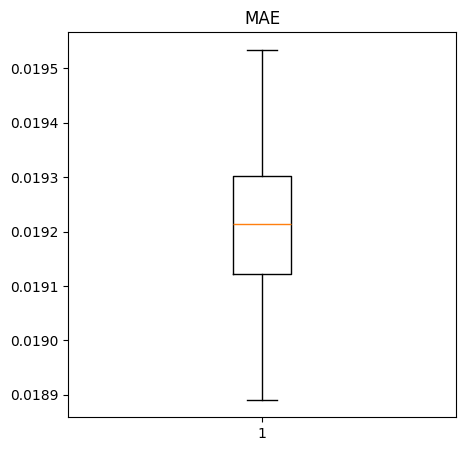

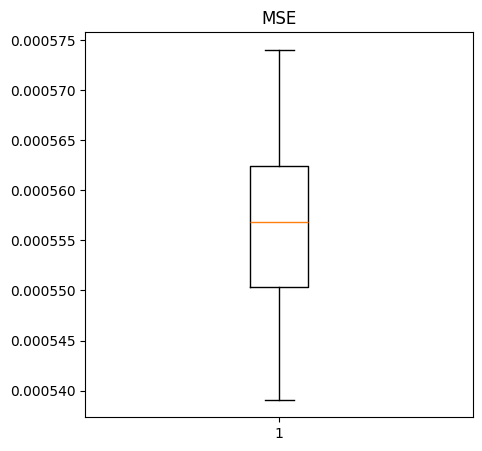

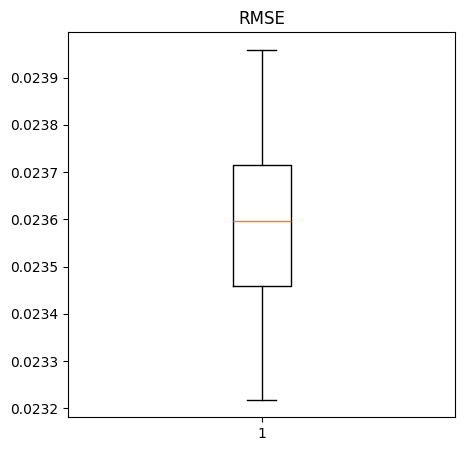

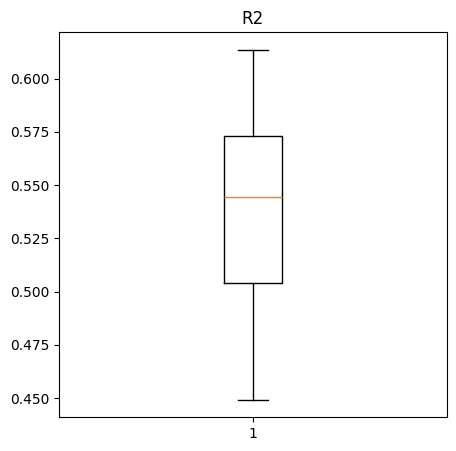

''

In [ ]:
#Bow plot for the measures
for column in knnResults.columns:
    plt.figure(figsize=(5, 5)) #I will plot the regression metrics for each iteration in the loop of SelectKBest in a boxplot it will help me to see the distribution of the regression metrics
    plt.boxplot(knnResults[column], vert=True)
    plt.title(column)
    plt.show()
''''''

In [ ]:
TheResults = {}
TheResults['KNN Regressor'] = {'MAE': round(knnResults['MAE'].mean(), 3),
                            'MSE': round(knnResults['MSE'].mean(), 3),
                            'RMSE': round(knnResults['RMSE'].mean(), 3),
                            'R2': round(knnResults['R2'].mean(), 3)}
TheResults #I will store the regression metrics for the KNN regressor in this dictionary 'TheResults'

{'KNN Regressor': {'MAE': 0.019, 'MSE': 0.001, 'RMSE': 0.024, 'R2': 0.542}}

In [ ]:
knnResults.mean() #I will calculate the average 'Mean' of the regression metrics for the KNN regressor

MAE     0.019202
MSE     0.000556
RMSE    0.023589
R2      0.541893
dtype: float64

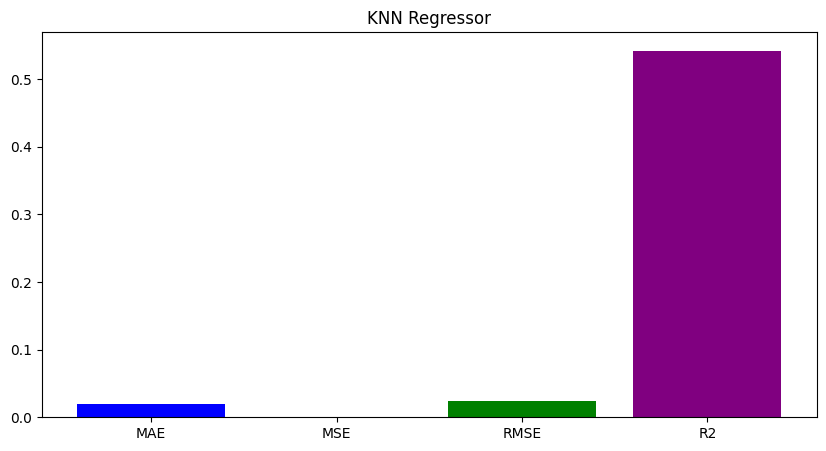

In [ ]:
plt.figure(figsize=(10, 5)) #This plot 'Bar Chart' will help me to see the average of the regression metrics for the KNN regressor
plt.bar(TheResults['KNN Regressor'].keys(), TheResults['KNN Regressor'].values(), color=['blue', 'red', 'green', 'purple'])
plt.title('KNN Regressor')
plt.show()

Decision Tree Regressor

In [ ]:
DTR_results = [] #I will use this list to store the regression metrics for each iteration in the loop of SelectKBest for the Decision Tree Regressor
for i in range(50): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    DTR = DecisionTreeRegressor().fit(X_train, y_train) #I use the Decision Tree Regressor model
    y_pred = DTR.predict(X_test)

    SKB_mae_DTR = mean_absolute_error(y_test, y_pred)
    SKB_mse_DTR = mean_squared_error(y_test, y_pred)
    SKB_rmse_DTR = np.sqrt(SKB_mse_DTR)
    SKB_r2_DTR = r2_score(y_test, y_pred)

    metrics = { #I'm going to store the regression metrics in this dictionary 'metrics'
        'MAE': SKB_mae_DTR,
        'MSE': SKB_mse_DTR,
        'RMSE': SKB_rmse_DTR,
        'R2': SKB_r2_DTR
    }

    DTR_results.append(metrics)

In [ ]:
DRTResults = pd.DataFrame(DTR_results) #I will store the regression metrics in this dataframe 'DRTResults'

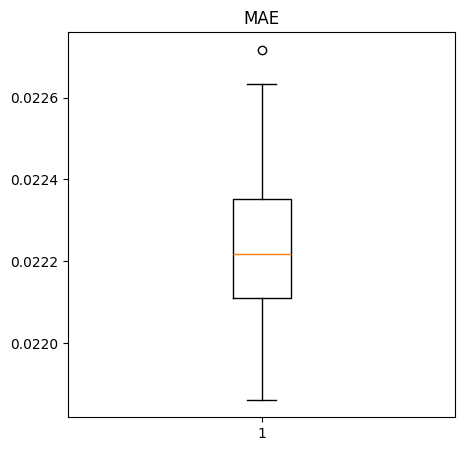

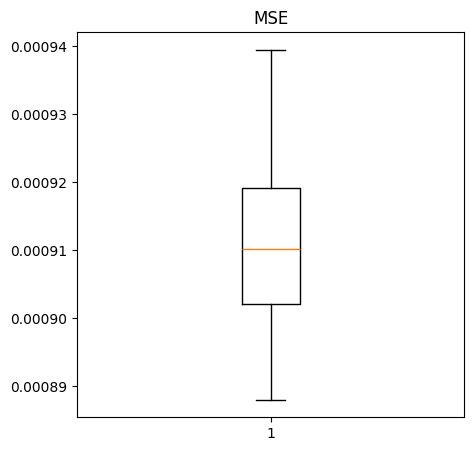

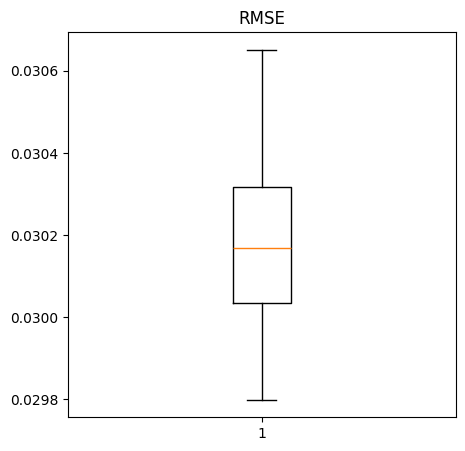

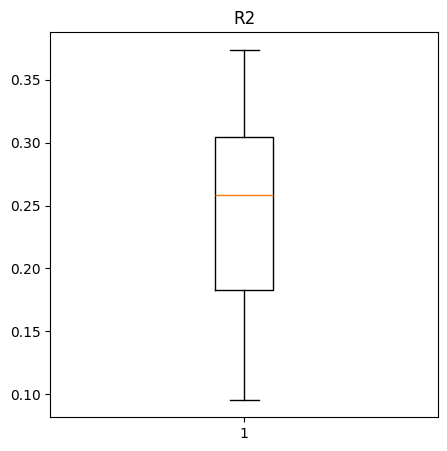

In [ ]:
for column in DRTResults.columns: #I will plot the regression metrics for each iteration in the loop of SelectKBest in a boxplot it will help me to see the distribution of the regression metrics
    plt.figure(figsize=(5, 5))
    plt.boxplot(DRTResults[column], vert=True)
    plt.title(column)
    plt.show()

In [ ]:
DRTResults.mean()

MAE     0.022238
MSE     0.000911
RMSE    0.030181
R2      0.250018
dtype: float64

In [ ]:
#Making result for the Decision Tree Regressor
TheResultsDTR = {}
TheResultsDTR['Decision Tree Regressor'] = {'MAE': round(DRTResults['MAE'].mean(), 3),
                            'MSE': round(DRTResults['MSE'].mean(), 3),
                            'RMSE': round(DRTResults['RMSE'].mean(), 3),
                            'R2': round(DRTResults['R2'].mean(), 3)}
TheResultsDTR

{'Decision Tree Regressor': {'MAE': 0.022,
  'MSE': 0.001,
  'RMSE': 0.03,
  'R2': 0.25}}

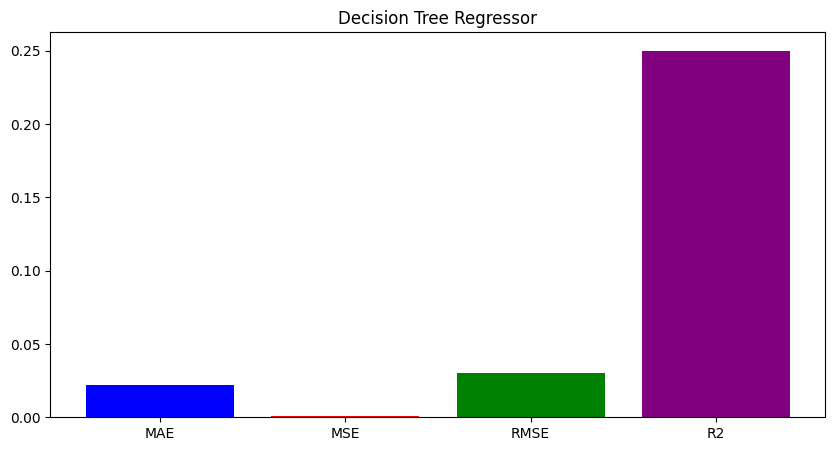

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(TheResultsDTR['Decision Tree Regressor'].keys(), TheResultsDTR['Decision Tree Regressor'].values(), color=['blue', 'red', 'green', 'purple'])
plt.title('Decision Tree Regressor')
plt.show()

## 2. Recursive feature elimination: *Feature Selection*

In [ ]:
#Recursive Feature Elimination
reg = LinearRegression().fit(X_train_selected, y_train) #I use the linear regression model to fit the selected features for the Recursive Feature Elimination method 'RFE' 
y_pred = reg.predict(X_test_selected) #I will predict the testing data


mae = mean_absolute_error(y_test, y_pred) #These 'mse, mae, rmse, r2' are the regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  #np is for numpy library and sqrt is for square root and I use it to calculate the RMSE by mse
r2 = r2_score(y_test, y_pred)


print("\nRegression Metrics:")
print("MAE:", round(mae, 3)) #I use the round function to round the number to 3 decimal places
print("MSE:", round(mse, 6))  #I use the round function to round the number to 6 decimals
print("R²:", round(r2, 3))


Regression Metrics:
MAE: 0.018
MSE: 0.000455
R²: 0.65


In [ ]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5) #I will use the Recursive Feature Elimination method 'RFE' to select the best 5 features
rfe.fit(X, y)


selected_columns = X.columns[rfe.support_]
print("These are the selected columns:", selected_columns)

X_selected_rfe = rfe.transform(X)

These are the selected columns: Index(['Passenger Fatalities', 'People Waiting or Leaving Fatalities',
       'Other Worker Fatalities', 'Total Other Fatalities',
       'Total Fatalities'],
      dtype='object')


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root 

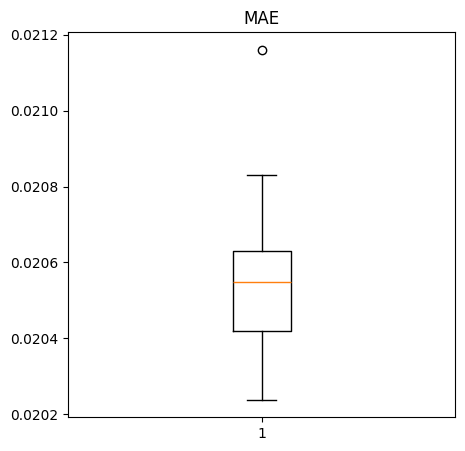

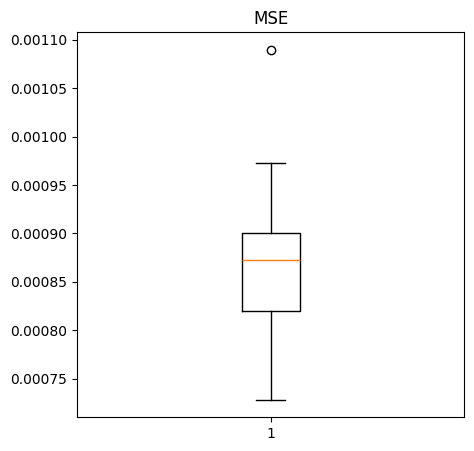

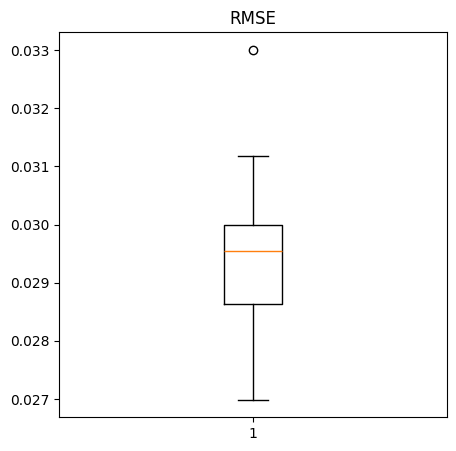

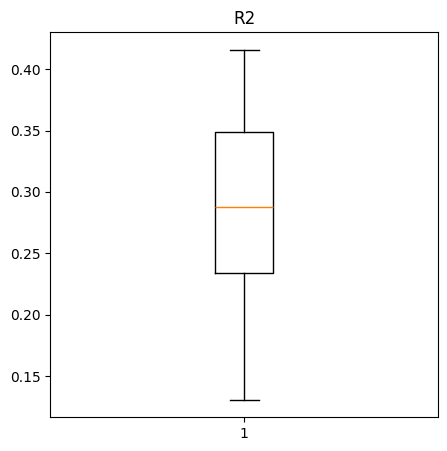

In [ ]:
rfe_results = [] #I will use this list to store the regression metrics for each iteration in the loop of rfe
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_selected_rfe, y, test_size=0.2, random_state=i)
    rfe_model = LinearRegression().fit(X_train, y_train) #I use the linear regression model to fit the selected features for the Recursive Feature Elimination method 'RFE'
    y_pred = rfe_model.predict(X_test)

    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2': r2_score(y_test, y_pred)
    }

    rfe_results.append(metrics)

rfeResults = pd.DataFrame(rfe_results)

# Boxplot for the measures
for column in rfeResults.columns:
    plt.figure(figsize=(5, 5))
    plt.boxplot(rfeResults[column], vert=True)
    plt.title(column)
    plt.show()

In [ ]:
TheResults = {} #I will store the regression metrics for the linear regression model in this dictionary 'TheResults'
TheResults['Linear Regression with RFE'] = {
    'MAE': round(rfeResults['MAE'].mean(), 4), #I use the round function to round the number to 4 decimal places
    'MSE': round(rfeResults['MSE'].mean(), 5),
    'RMSE': round(rfeResults['RMSE'].mean(), 4),
    'R2': round(rfeResults['R2'].mean(), 4)
}

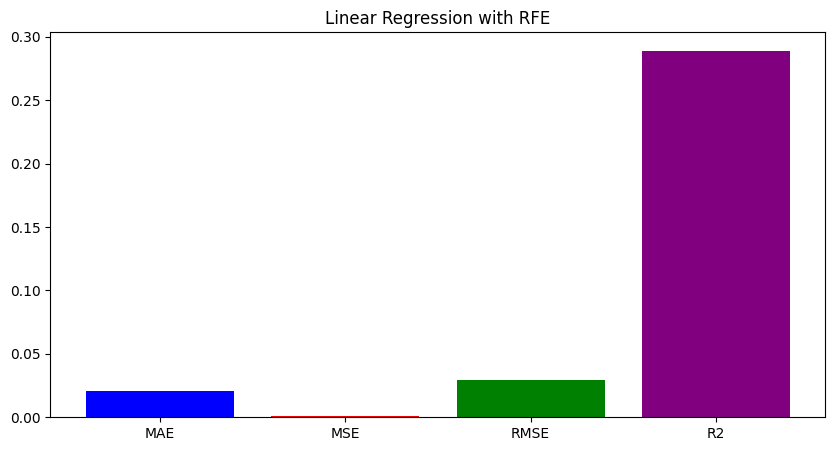

In [ ]:
plt.figure(figsize=(10, 5)) #This plot 'Bar Chart' will help me to see the average of the regression metrics for the linear regression model
plt.bar(TheResults['Linear Regression with RFE'].keys(), TheResults['Linear Regression with RFE'].values(), color=['blue', 'red', 'green', 'purple'])
plt.title('Linear Regression with RFE')
plt.show()

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root 

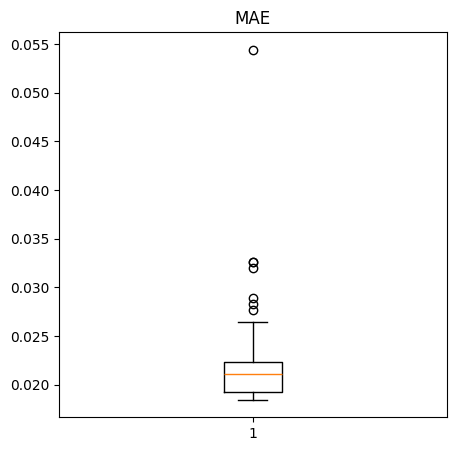

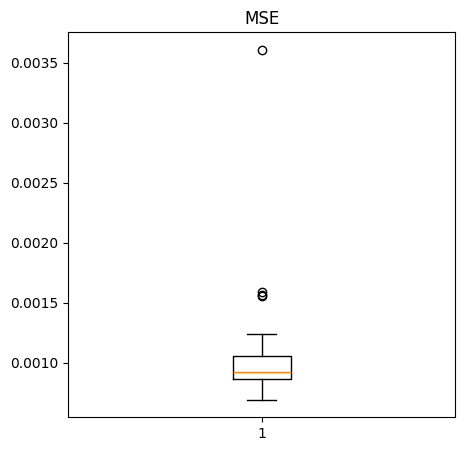

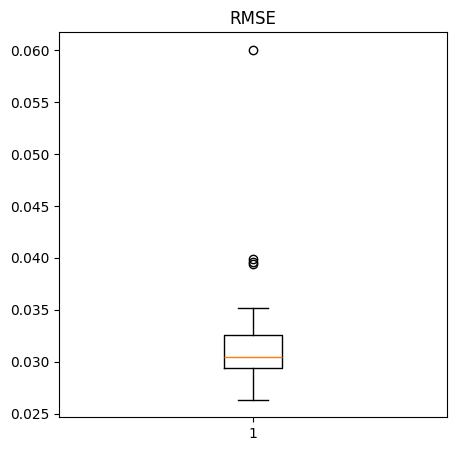

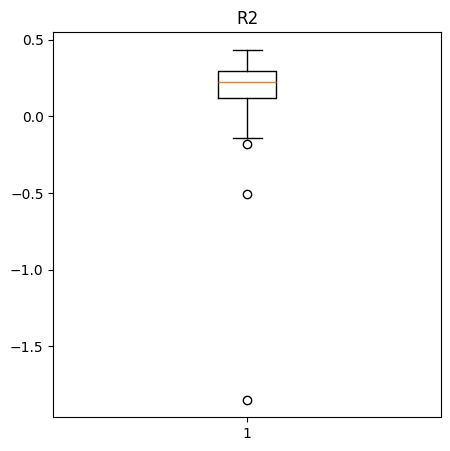

In [ ]:
knn_results = [] #I will use this list to store the regression metrics for each iteration in the loop of rfe for the KNN regressor
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_selected_rfe, y, test_size=0.2, random_state=i)
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test) #I will predict the testing data

    metrics = {     #I'm going to store the regression metrics in this dictionary 'metrics'
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2': r2_score(y_test, y_pred)
    }

    knn_results.append(metrics) #I store the regression metrics in this list 'knn_results'

knnResults = pd.DataFrame(knn_results)

# Boxplot for the measures
for column in knnResults.columns:
    plt.figure(figsize=(5, 5))
    plt.boxplot(knnResults[column], vert=True) #I will plot the regression metrics for each iteration in the loop of rfe in a boxplot it will help me to see the distribution of the regression metrics
    plt.title(column)
    plt.show()

In [ ]:
TheResults['KNN Regressor with RFE'] = { #I will store the regression metrics for the KNN regressor in this dictionary 'TheResults'
    'MAE': round(knnResults['MAE'].mean(), 3),
    'MSE': round(knnResults['MSE'].mean(), 3),
    'RMSE': round(knnResults['RMSE'].mean(), 3),
    'R2': round(knnResults['R2'].mean(), 3)
}
TheResults

{'Linear Regression with RFE': {'MAE': 0.021,
  'MSE': 0.001,
  'RMSE': 0.029,
  'R2': 0.289},
 'KNN Regressor with RFE': {'MAE': 0.023,
  'MSE': 0.001,
  'RMSE': 0.032,
  'R2': 0.156}}

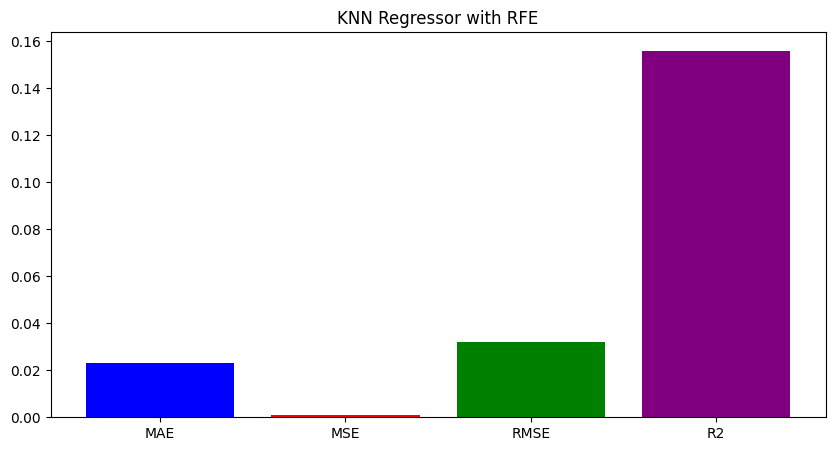

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(TheResults['KNN Regressor with RFE'].keys(), TheResults['KNN Regressor with RFE'].values(), color=['blue', 'red', 'green', 'purple'])
plt.title('KNN Regressor with RFE')
plt.show()

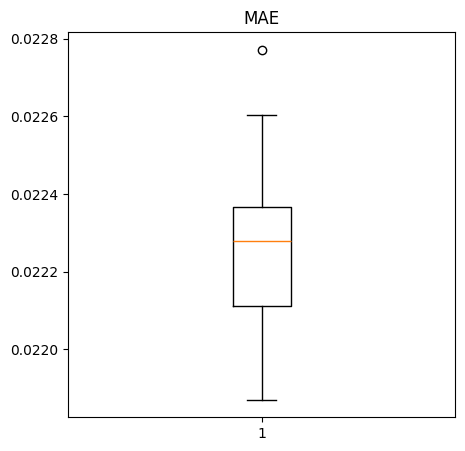

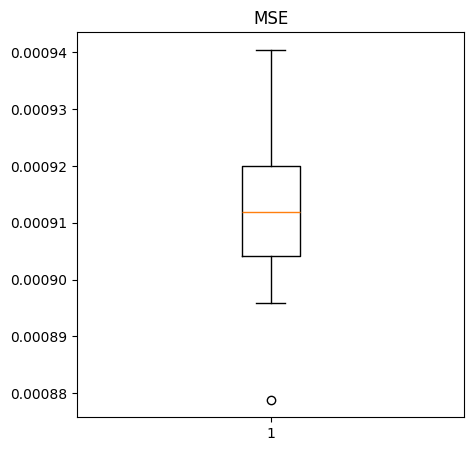

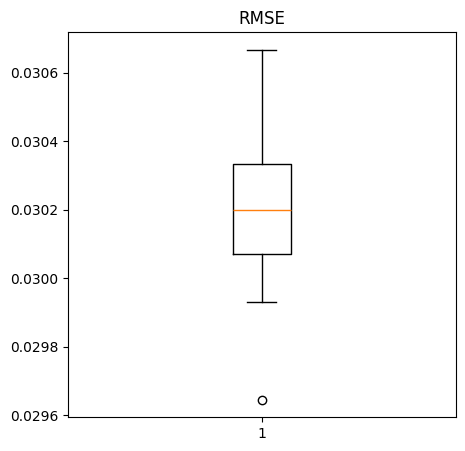

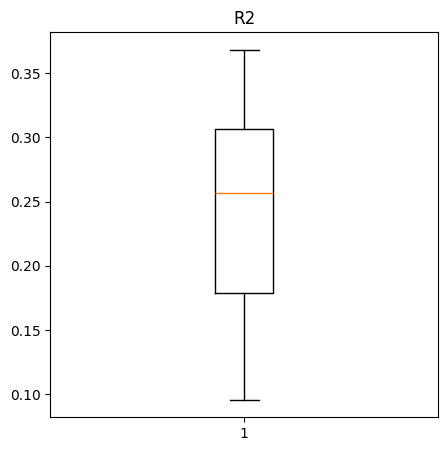

In [ ]:
DTR_results = [] #I will use the list to store the regression metrics for each iteration in the loop of rfe for the Decision Tree Regressor
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i) #I will split the data into training and testing data
    DTR = DecisionTreeRegressor().fit(X_train, y_train) #I have used the Decision Tree Regressor model
    y_pred = DTR.predict(X_test) #I will predict the testing data

    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred), #I will calculate mse for the Decision Tree Regressor
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred) #I will calculate r2 for the Decision Tree Regressor
    }
    DTR_results.append(metrics)

DTRResults = pd.DataFrame(DTR_results) #I will store the regression metrics in this dataframe 'DTRResults'

# Boxplot for the measures
for column in DTRResults.columns:
    plt.figure(figsize=(5, 5))
    plt.boxplot(DTRResults[column], vert=True) #I will plot the regression metrics for each iteration in the loop of rfe in a boxplot it will help me to see the distribution of the regression metrics
    plt.title(column) 
    plt.show()


In [ ]:
TheResults['Decision Tree Regressor with RFE'] = { #I will store the regression metrics for the Decision Tree Regressor in this dictionary 'TheResults'
    'MAE': round(DTRResults['MAE'].mean(), 3),
    'MSE': round(DTRResults['MSE'].mean(), 3),
    'RMSE': round(DTRResults['RMSE'].mean(), 3),
    'R2': round(DTRResults['R2'].mean(), 3)
}

In [ ]:
TheResults['Decision Tree Regressor with RFE'] #I print the regression metrics of the Decision Tree Regressor

{'MAE': 0.022, 'MSE': 0.001, 'RMSE': 0.03, 'R2': 0.248}

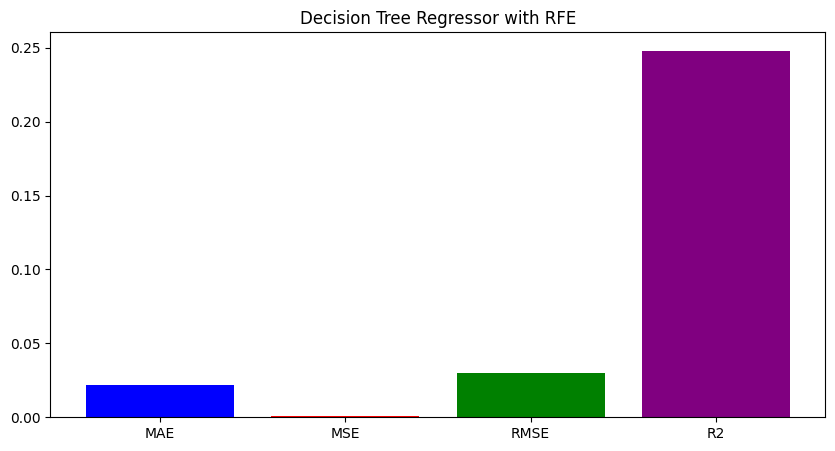

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(TheResults['Decision Tree Regressor with RFE'].keys(), TheResults['Decision Tree Regressor with RFE'].values(), color=['blue', 'red', 'green', 'purple']) #This plot 'Bar Chart' will help me to see the average of the regression metrics for the Decision Tree Regressor
plt.title('Decision Tree Regressor with RFE')
plt.show()

In [ ]:
Comparing_SKB = pd.DataFrame({'Models': ['Linear Regression', 'KNN Regressor', 'Decision Tree Regressor'], #I will compare the regression metrics for the SelectKBest method
                              'MAE in SelectKBest': [SKB_mae_DTR, SKB_mae_KNN, SKB_mae_linear],
                              'MSE in SelectKBest': [SKB_mse_DTR, SKB_mse_KNN, SKB_mse_linear],
                              'RMSE in SelectKBest': [SKB_rmse_DTR, SKB_rmse_KNN, SKB_rmse_linear],
                              'R2 in SelectKBest': [SKB_r2_DTR, SKB_r2_KNN, SKB_r2_linear],})

Comparing_SKB

,Models,MAE in SelectKBest,MSE in SelectKBest,RMSE in SelectKBest,R2 in SelectKBest
0,Linear Regression,0.022206,0.000906,0.030098,0.303439
1,KNN Regressor,0.019139,0.000555,0.023555,0.573362
2,Decision Tree Regressor,0.018173,0.000455,0.021336,0.649976


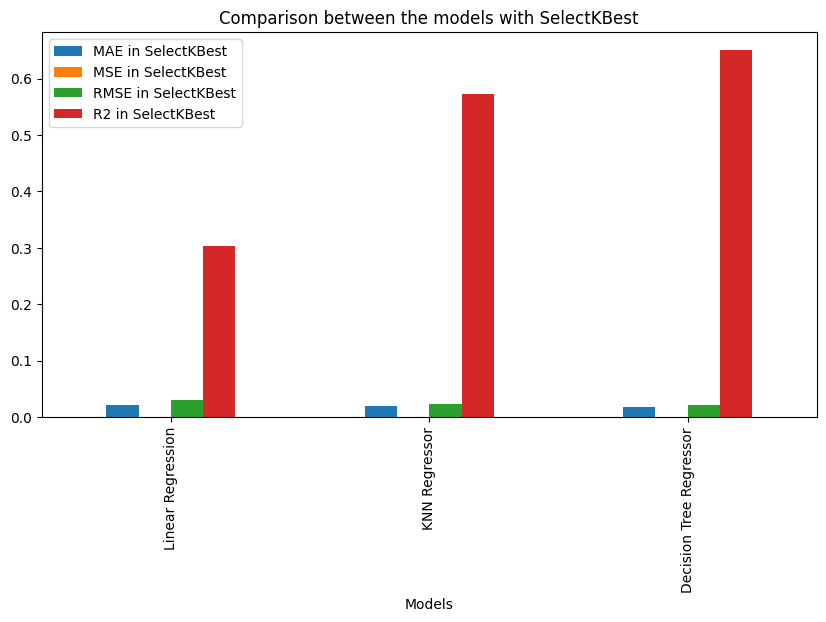

In [ ]:
Comparing_SKB.plot(x='Models', y=['MAE in SelectKBest', 'MSE in SelectKBest', 'RMSE in SelectKBest', 'R2 in SelectKBest'], kind='bar', figsize=(10, 5)) #I will plot the regression metrics for the SelectKBest method in a bar chart for all the models
plt.title('Comparison between the models with SelectKBest')
plt.show()

In [ ]:
Comparing_RFE = pd.DataFrame({'Models': ['Linear Regression', 'KNN Regressor', 'Decision Tree Regressor'],  #I will compare all the regression metrics for the Recursive Feature Elimination method 'RFE'
                                'MAE in RFE': [rfeResults['MAE'].mean(), knnResults['MAE'].mean(), DTRResults['MAE'].mean()],
                                'MSE in RFE': [rfeResults['MSE'].mean(), knnResults['MSE'].mean(), DTRResults['MSE'].mean()],
                                'RMSE in RFE': [rfeResults['RMSE'].mean(), knnResults['RMSE'].mean(), DTRResults['RMSE'].mean()],
                                'R2 in RFE': [rfeResults['R2'].mean(), knnResults['R2'].mean(), DTRResults['R2'].mean()],})

Comparing_RFE

,Models,MAE in RFE,MSE in RFE,RMSE in RFE,R2 in RFE
0,Linear Regression,0.020533,0.000866,0.029404,0.288814
1,KNN Regressor,0.022608,0.001030,0.031704,0.155911
2,Decision Tree Regressor,0.022260,0.000913,0.030213,0.248450


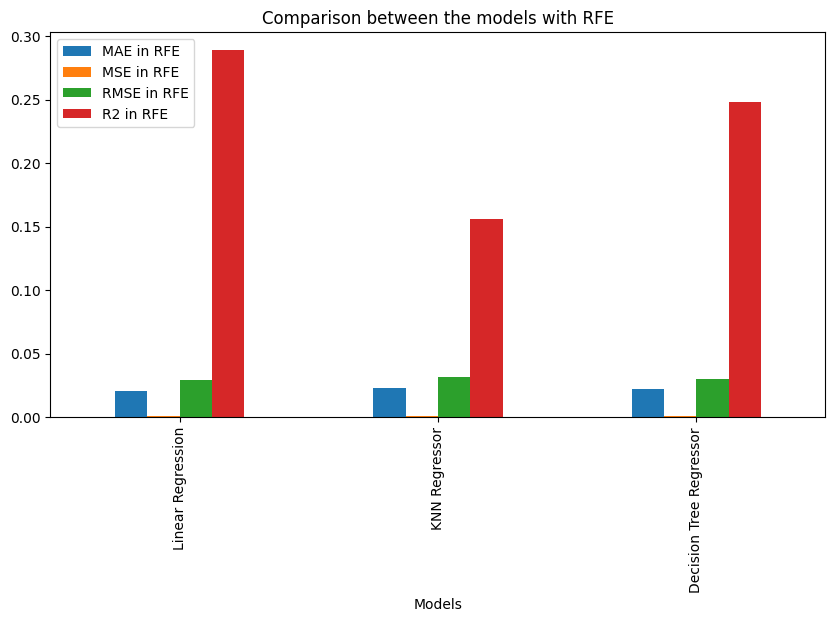

In [ ]:
Comparing_RFE.plot(x='Models', y=['MAE in RFE', 'MSE in RFE', 'RMSE in RFE', 'R2 in RFE'], kind='bar', figsize=(10, 5)) #I will plot the regression metrics for the RFE method in a bar chart for all the models
plt.title('Comparison between the models with RFE') 
plt.show()

-------------------------------

In [ ]:
Data.head() 

,NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (True/False),Primary UZA UACE Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,...,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries,Rate
0,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000
1,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.055038
2,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.029486
3,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.013352
4,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000


In [ ]:

Data['Rate'].value_counts() 

Rate
0.000000    18343
0.023035        2
0.039157        2
0.009539        2
0.058071        2
            ...  
0.042171        1
0.011133        1
0.047638        1
0.031750        1
0.047714        1
Name: count, Length: 21381, dtype: int64

<Axes: >

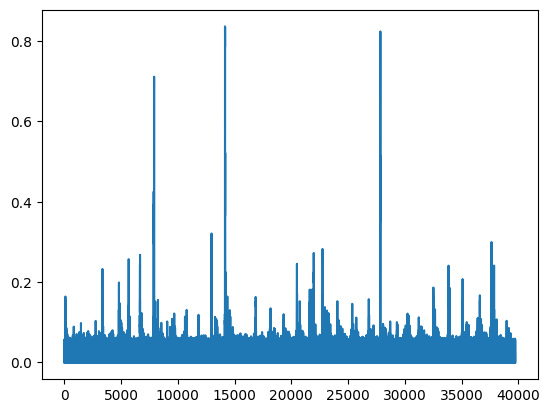

In [ ]:
Data['Rate'].plot()

In [ ]:
#Data['Service Area Population'].plot()

SMA

In [ ]:
#The SMA is calculated by adding the closing prices of the stock for a specific period and then dividing by the number of months in this period
Data['12-month-SMA'] = Data['Rate'].rolling(window=4).mean() #I will calculate the 12-month-SMA for the Rate column

<Axes: >

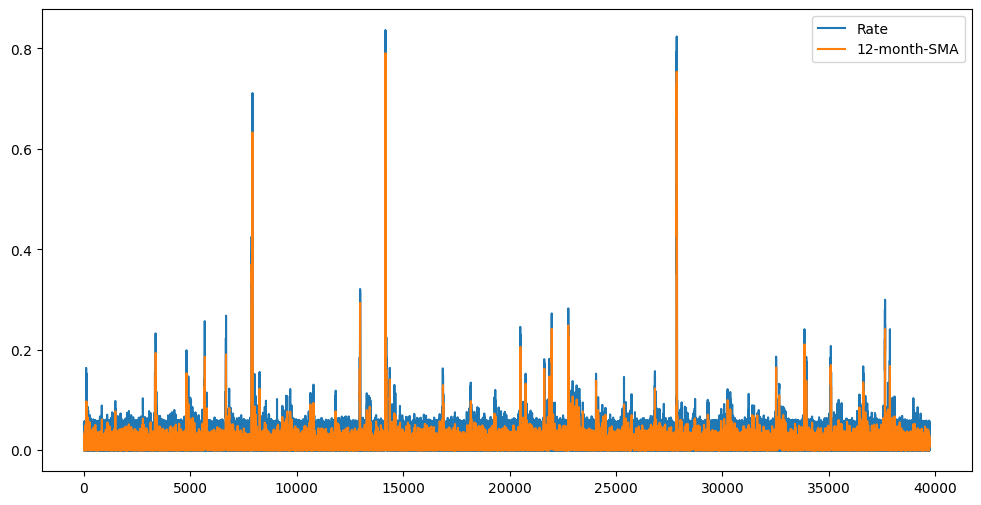

In [ ]:
Data[['Rate', '12-month-SMA']].plot(figsize=(12, 6)) #I will plot the Rate and 12-month-SMA columns

In [ ]:
Data['2-year-SMA'] = Data['Rate'].rolling(window=8).mean() #I will calculate the 2-year-SMA for the Rate column

<Axes: >

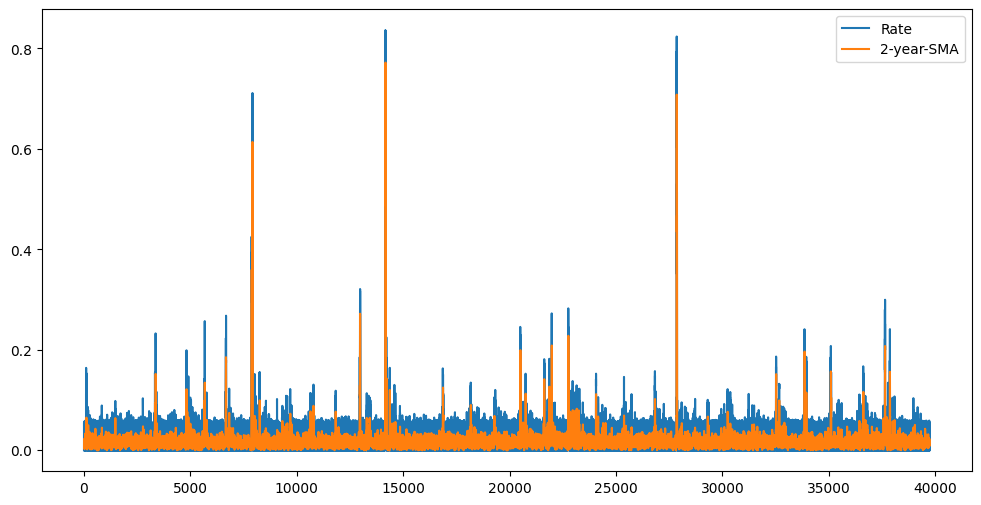

In [ ]:
Data[['Rate', '2-year-SMA']].plot(figsize=(12, 6)) #I will plot the Rate and 2-year-SMA columns

In [ ]:
Data['3-year-SMA'] = Data['Rate'].rolling(window=8).mean()  #I will calculate the 3-year-SMA for the Rate column and window=8 because the data is monthly so 8 months = 3 years

<Axes: >

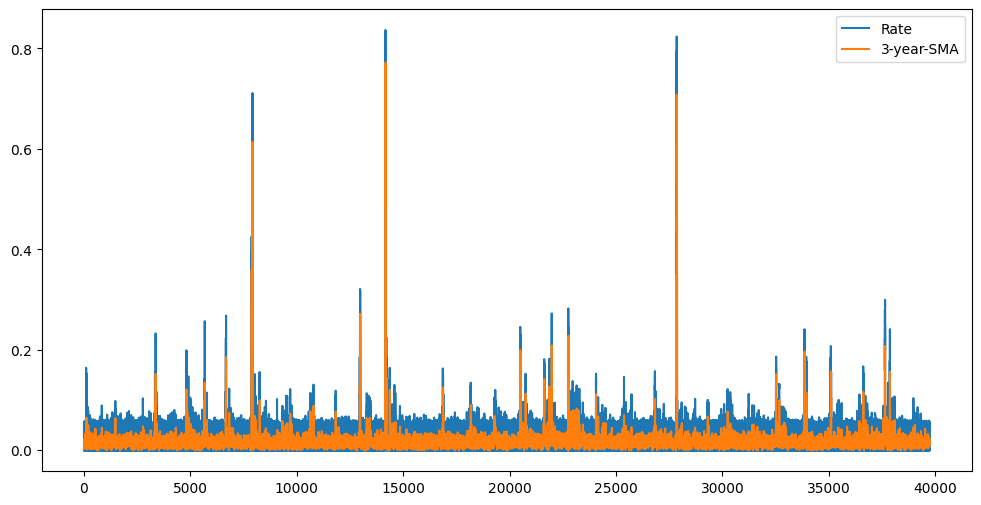

In [ ]:
Data[['Rate', '3-year-SMA']].plot(figsize=(12, 6)) #I will plot the Rate and 3-year-SMA columns

EMWA

In [ ]:
#The EWMA is calculated by taking the average of the closing prices of the stock for a specific period and then multiplying by a smoothing factor and span is the number of months in this period
Data['EWMA-12'] = Data['Rate'].ewm(span=12, adjust=False).mean() #I will calculate the EWMA-12 for the Rate column

In [ ]:
Data['Year'] = Data['Rate'].ewm(span=12, adjust=False).mean()

<Axes: >

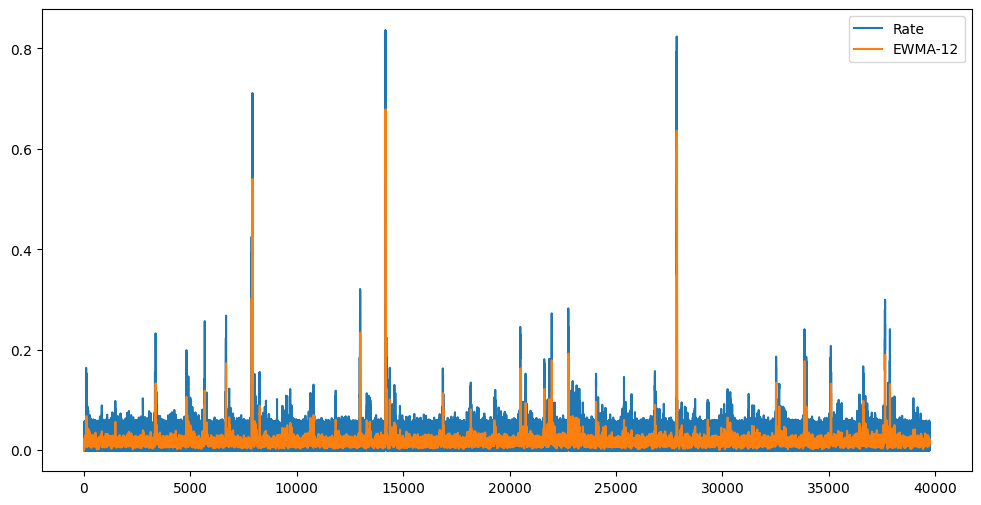

In [ ]:
Data[['Rate', 'EWMA-12']].plot(figsize=(12, 6)) #I will plot the Rate and EWMA-12 columns

In [ ]:
#Data[['Rate', 'Year']].plot(figsize=(12, 6)) 

LSTM

In [ ]:
#%pip install keras
#%pip install tensorflow

In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM #I will use the SimpleRNN and LSTM layers
from sklearn.preprocessing import MinMaxScaler #I will use the MinMaxScaler to scale the data

In [ ]:
#%pip install --upgrade keras tensorflow

In [ ]:
Data.sort_index(inplace=True)

In [ ]:
X = Data['Rate'] #I will use the Rate column as the input data
Y = Data['Year'] #I will use the Year column as the output data

In [ ]:
X = np.array(X).reshape(-1, 1, 1)####This is going to reshape the input data

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)) #I will scale the data between 0 and 1
Y = scaler.fit_transform(np.array(Y).reshape(-1, 1)) #I will scale the output data

In [ ]:
train_size = int(len(X) * 0.7) #I will use 70% of the data for training and 30% for testing
test_size = len(X) - train_size #I will use 70% of the data for training and 30% for testing
X_train, X_test = X[0:train_size], X[train_size:len(X)] 
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

In [ ]:
model = Sequential()  #I will use the Sequential model to build the neural network model for the SimpleRNN layer and LSTM layer 
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))##
model.add(SimpleRNN(units=50))##
model.add(Dense(units=1))##


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
X = Data['Rate'] #I will use the Rate column as the input data
Y = Data['Year']  #I will use the Year column as the output data

 
scaler = MinMaxScaler(feature_range=(0, 1)) #I will scale the data between 0 and 1 and this is because the data is not in the same range so scaling it will help the model to learn better
Y = scaler.fit_transform(np.array(Y).reshape(-1, 1)) #I will scale the output data

X = np.array(X).reshape(-1, 1, 1) #This is going to reshape the input data

train_size = int(len(X) * 0.7) #I will use 70% of the data for training and 30% for testing
test_size = len(X) - train_size #I will use 70% of the data for training and 30% for testing
X_train, X_test = X[0:train_size], X[train_size:len(X)] 
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]


model = Sequential()  #I will use the Sequential model to build the neural network model for the SimpleRNN layer and LSTM layer 
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # the shape of the input data is (1, 1) so I will use the input_shape=(X_train.shape[1], 1) to build the model
model.add(LSTM(units=50))
model.add(Dense(units=1)) #I will use the Dense layer to add the output layer so with that the number of layers in the model is 3


model.compile(optimizer='adam', loss='mean_squared_error') #I will compile the model with the optimizer 'adam' and the loss function 'mean_squared_error' adam is used to update the weights of the model


model.fit(X_train, Y_train, epochs=100, batch_size=32) # the epochs is the number of times the model will train on the data and the batch_size is the number of samples that will be used to train the model at once


train_score = model.evaluate(X_train, Y_train, verbose=0) #I will evaluate the model using the training data 
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score, np.sqrt(train_score)))
test_score = model.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (test_score, np.sqrt(test_score)))

Epoch 1/100


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


870/870 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0012
Epoch 2/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.6211e-04
Epoch 3/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.0272e-04
Epoch 4/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.1026e-04
Epoch 5/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.5158e-04
Epoch 6/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.7346e-04
Epoch 7/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.5043e-04
Epoch 8/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.3678e-04
Epoch 9/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.5038e-04
Epoch 10/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.3437e-04
Epoch 11/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.1956e-04
Epoch 12/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.9245e-04
Epoch 13/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 5.2251e-04
Epoch 14/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 4.3151e-04
Epo

__________________________

### Calculate MSE and R-squared for SMA and EMA and LSTM

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Data['12-month-SMA'] = Data['Rate'].rolling(window=4).mean() #SMA is the simple moving average and it is calculated by adding the closing prices of the stock for a specific period and then dividing by the number of months in this period
Data['2-year-SMA'] = Data['Rate'].rolling(window=8).mean()
Data['3-year-SMA'] = Data['Rate'].rolling(window=8).mean()
Data['EWMA-12'] = Data['Rate'].ewm(span=12, adjust=False).mean() #EWMA is the exponential moving average and it is calculated by taking the average of the closing prices of the stock for a specific period and then multiplying by a smoothing factor and span is the number of months in this period

In [ ]:
sma_data = Data[['Rate', '12-month-SMA', '2-year-SMA', '3-year-SMA', 'EWMA-12']].dropna()

In [ ]:
mse_12_sma = mean_squared_error(sma_data['Rate'], sma_data['12-month-SMA'])
r2_12_sma = r2_score(sma_data['Rate'], sma_data['12-month-SMA'])

mse_2_year_sma = mean_squared_error(sma_data['Rate'], sma_data['2-year-SMA'])
r2_2_year_sma = r2_score(sma_data['Rate'], sma_data['2-year-SMA'])

mse_3_year_sma = mean_squared_error(sma_data['Rate'], sma_data['3-year-SMA'])
r2_3_year_sma = r2_score(sma_data['Rate'], sma_data['3-year-SMA'])

mse_ewma = mean_squared_error(sma_data['Rate'], sma_data['EWMA-12'])
r2_ewma = r2_score(sma_data['Rate'], sma_data['EWMA-12'])

print(f"12-month SMA: MSE = {mse_12_sma:.6f}, R-Seqaured = {r2_12_sma:.6f}")
print(f"2-year SMA: MSE = {mse_2_year_sma:.6f}, R-Seqaured = {r2_2_year_sma:.6f}")
print(f"3-year SMA: MSE = {mse_3_year_sma:.6f}, R-Seqaured = {r2_3_year_sma:.6f}")
print(f"EWMA-12: MSE = {mse_ewma:.6f}, R-Seqaured = {r2_ewma:.6f}")

12-month SMA: MSE = 0.000422, R-Seqaured = 0.650961
2-year SMA: MSE = 0.000590, R-Seqaured = 0.511746
3-year SMA: MSE = 0.000590, R-Seqaured = 0.511746
EWMA-12: MSE = 0.000550, R-Seqaured = 0.544854


In [ ]:
ema_data = Data[['Rate', 'EWMA-12']].dropna()

In [ ]:
mse_ewma = mean_squared_error(ema_data['Rate'], ema_data['EWMA-12'])
r2_ewma = r2_score(ema_data['Rate'], ema_data['EWMA-12'])

print(f"EWMA-12: MSE = {mse_ewma:.6f}, R-Seqaured = {r2_ewma:.6f}")

EWMA-12: MSE = 0.000550, R-Seqaured = 0.544825


In [ ]:
Y = Data['Rate'].values
X = np.arange(len(Y)).reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
Y = scaler.fit_transform(Y.reshape(-1, 1))
X = X.reshape(-1, 1, 1)


train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

model = Sequential([LSTM(50, return_sequences=True, input_shape=(1, 1)),
                    LSTM(50), Dense(1)])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=0)


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
Y_train_pred = scaler.inverse_transform(model.predict(X_train))
Y_test_pred = scaler.inverse_transform(model.predict(X_test))
Y_train = scaler.inverse_transform(Y_train)
Y_test = scaler.inverse_transform(Y_test)

870/870 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
373/373 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
mse_lstm_train = mean_squared_error(Y_train, Y_train_pred)
r2_lstm_train = r2_score(Y_train, Y_train_pred)
mse_lstm_test = mean_squared_error(Y_test, Y_test_pred)
r2_lstm_test = r2_score(Y_test, Y_test_pred)

In [ ]:
for col in ['12-month-SMA', '2-year-SMA', '3-year-SMA', 'EWMA-12']:
    valid_idx = Data[col].dropna().index
    mse = mean_squared_error(Data.loc[valid_idx, 'Rate'], Data.loc[valid_idx, col])
    r2 = r2_score(Data.loc[valid_idx, 'Rate'], Data.loc[valid_idx, col])
    print(f"{col}: MSE = {mse:.6f}, R-squared = {r2:.6f}")

12-month-SMA: MSE = 0.000422, R-squared = 0.650952
2-year-SMA: MSE = 0.000590, R-squared = 0.511746
3-year-SMA: MSE = 0.000590, R-squared = 0.511746
EWMA-12: MSE = 0.000550, R-squared = 0.544825


In [ ]:
print(f"LSTM Train: MSE = {mse_lstm_train:.6f}, R-squared = {r2_lstm_train:.9f}")
print(f"LSTM Test: MSE = {mse_lstm_test:.6f}, R-squared = {r2_lstm_test:.6f}")

LSTM Train: MSE = 0.001167, R-squared = -0.000049299
LSTM Test: MSE = 0.001307, R-squared = -0.000161


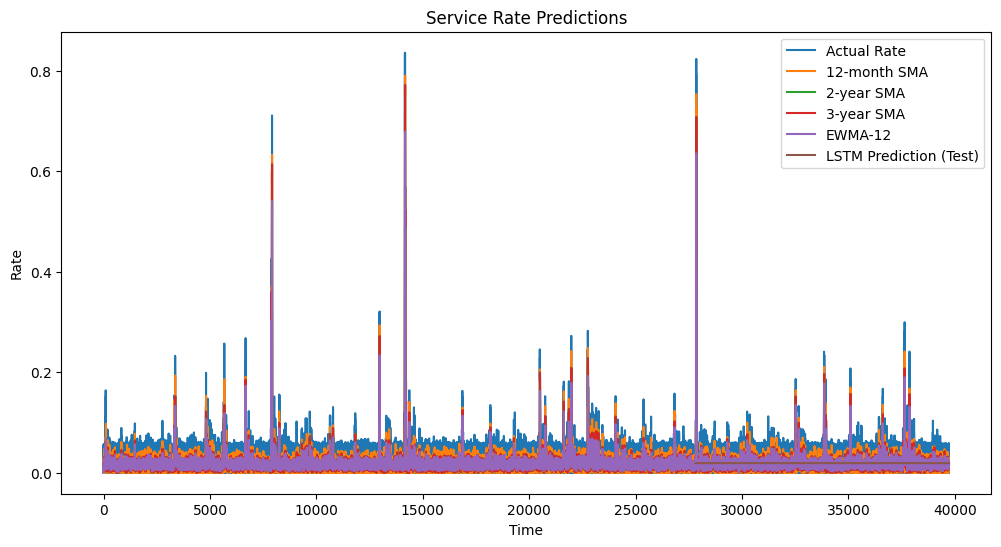

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(Data['Rate'], label='Actual Rate')
plt.plot(Data['12-month-SMA'], label='12-month SMA')
plt.plot(Data['2-year-SMA'], label='2-year SMA')
plt.plot(Data['3-year-SMA'], label='3-year SMA')
plt.plot(Data['EWMA-12'], label='EWMA-12')
plt.plot(np.arange(train_size, train_size + len(Y_test)), Y_test_pred, label='LSTM Prediction (Test)')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Service Rate Predictions')
plt.legend()
plt.show()

_________________________________________________

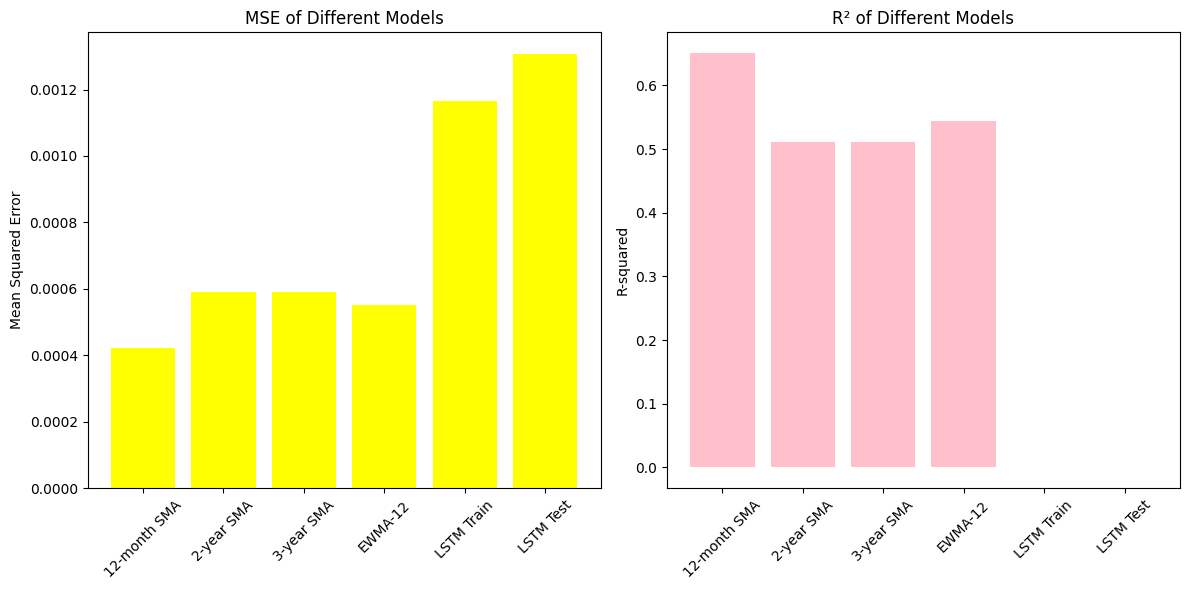

In [ ]:
models = ['12-month SMA', '2-year SMA', '3-year SMA', 'EWMA-12', 'LSTM Train', 'LSTM Test']
mse_values = [mse_12_sma, mse_2_year_sma, mse_3_year_sma, mse_ewma, mse_lstm_train, mse_lstm_test]
r2_values = [r2_12_sma, r2_2_year_sma, r2_3_year_sma, r2_ewma, r2_lstm_train, r2_lstm_test]

plt.figure(figsize=(12, 6))
x = np.arange(len(models))

plt.subplot(1, 2, 1)
plt.bar(x, mse_values, color='yellow')
plt.xticks(x, models, rotation=45)
plt.ylabel('Mean Squared Error')
plt.title('MSE of Different Models')

plt.subplot(1, 2, 2)
plt.bar(x, r2_values, color='pink')
plt.xticks(x, models, rotation=45)
plt.ylabel('R-squared')
plt.title('R² of Different Models')

plt.tight_layout()
plt.show()

# The Plots That You Need Are:

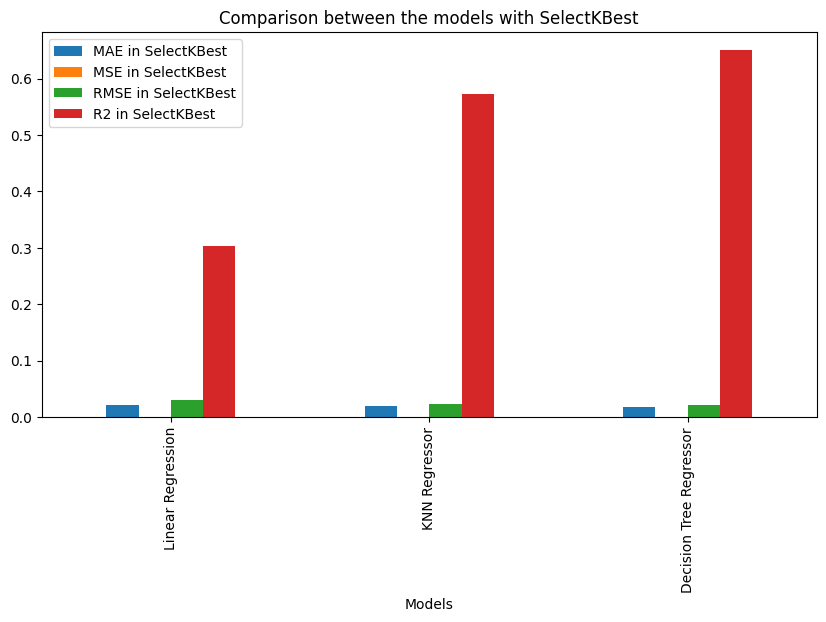

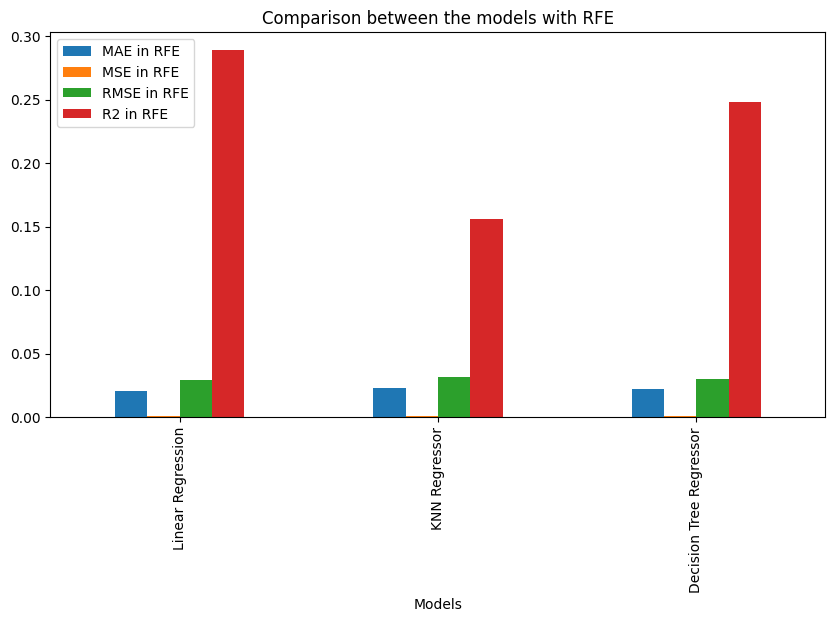

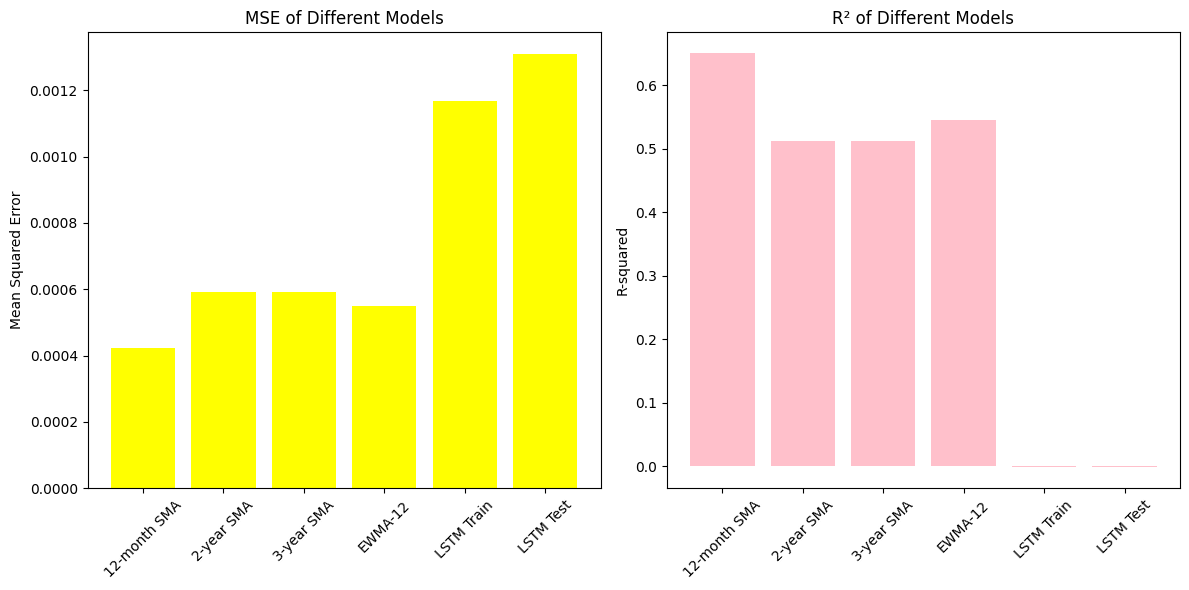